<a href="https://colab.research.google.com/github/SoungbinC/CMPE_255/blob/assignment4/Black_Friday_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

df = pd.read_csv("train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


We will explore data and anaylzie it.

In [12]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [13]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [14]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Let's check unique columns

In [16]:
df.columns = df.columns.str.lower()
print(len(df['product_id'].unique()))
print(len(df['gender'].unique()))
print(len(df['age'].unique()))
print(len(df['occupation'].unique()))
print(len(df['city_category'].unique()))
print(len(df['stay_in_current_city_years'].unique()))
print(len(df['marital_status'].unique()))

3631
2
7
21
3
5
2


In [18]:
df['product_category_3']=df['product_category_3'].fillna(0)
df['product_category_2']=df['product_category_2'].fillna(0)
df.isnull().sum()

user_id                       0
product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
product_category_3            0
purchase                      0
dtype: int64

Let's explore customers

#Gender

<Axes: >

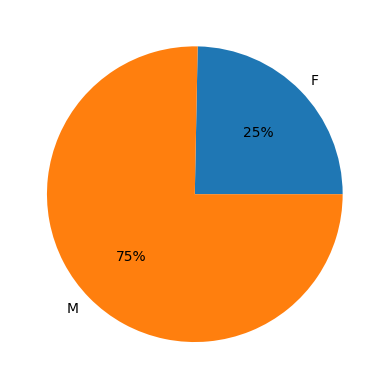

In [21]:

df.groupby(['gender']).size().plot(
    kind='pie', y=0, autopct='%1.0f%%')

#ages

<Axes: >

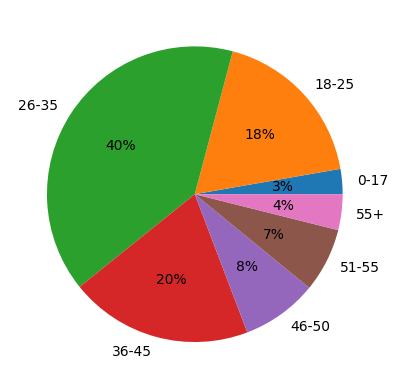

In [22]:
df.groupby(['age']).size().plot(
    kind='pie', y=0, autopct='%1.0f%%')

#Occupation


<Axes: >

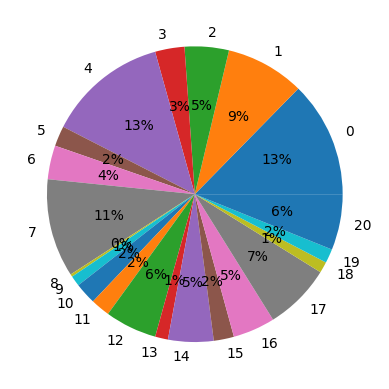

In [23]:
df.groupby(['occupation']).size().plot(
    kind='pie', y=0, autopct='%1.0f%%')

#Areas

<Axes: >

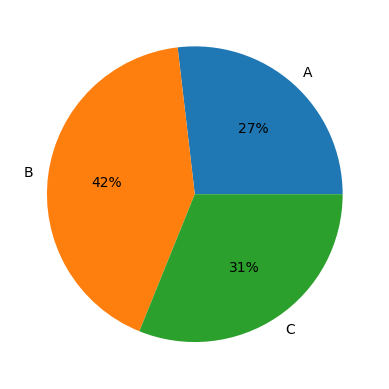

In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df.groupby(['city_category']).size().plot(
    kind='pie', y=0, autopct='%1.0f%%')

#Purchase distribution

<Axes: xlabel='purchase', ylabel='Density'>

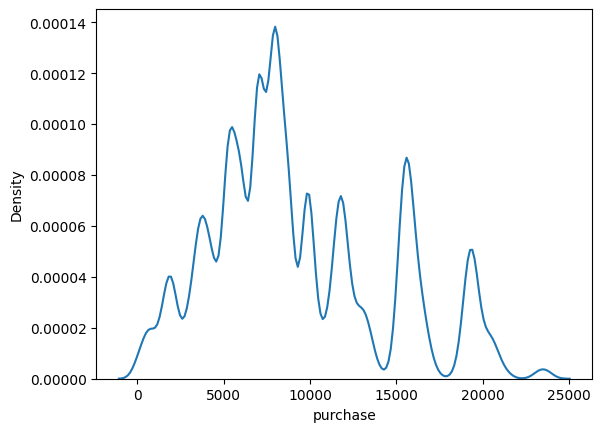

In [25]:
sns.kdeplot(df['purchase'])

<Axes: ylabel='purchase'>

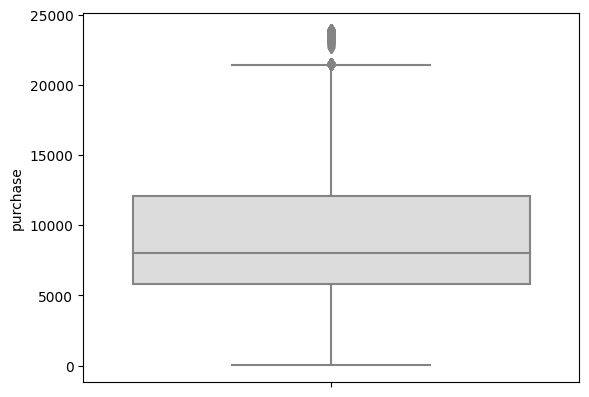

In [26]:
sns.boxplot(y="purchase", data=df, palette="coolwarm")

In [27]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [28]:
outliers = find_outliers_IQR(df['purchase'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 2677
max outlier value: 23961
min outlier value: 21401


343       23603
375       23792
652       23233
736       23595
1041      23341
          ...  
544488    23753
544704    23724
544743    23529
545663    23663
545787    23496
Name: purchase, Length: 2677, dtype: int64

In [29]:
df=df.loc[df['purchase']<=outliers.min()]

<Axes: ylabel='purchase'>

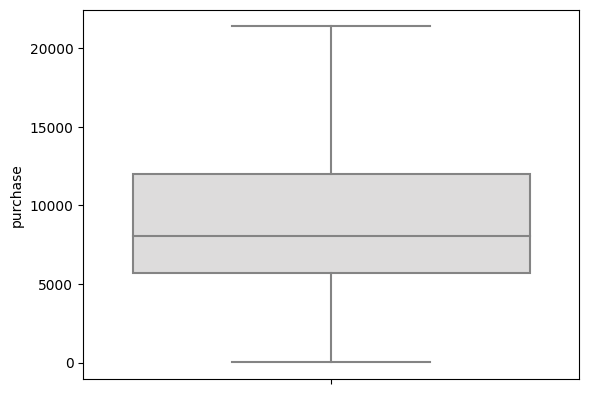

In [30]:
sns.boxplot(y="purchase", data=df, palette="coolwarm")

Relation with purchase and occupation and ages

<Axes: xlabel='age', ylabel='occupation'>

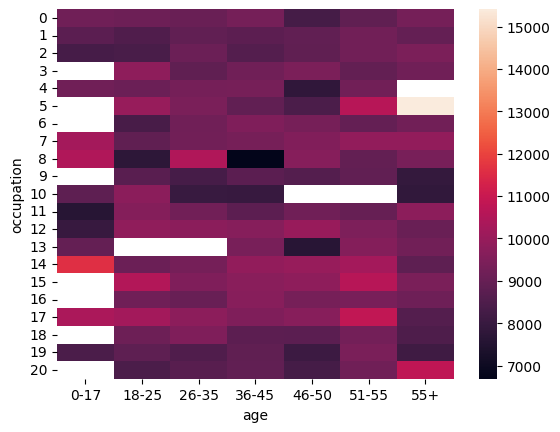

In [31]:
df_pivot = df.pivot_table(values='purchase', index='occupation', columns='age')
sns.heatmap(df_pivot)

<Axes: xlabel='occupation', ylabel='purchase'>

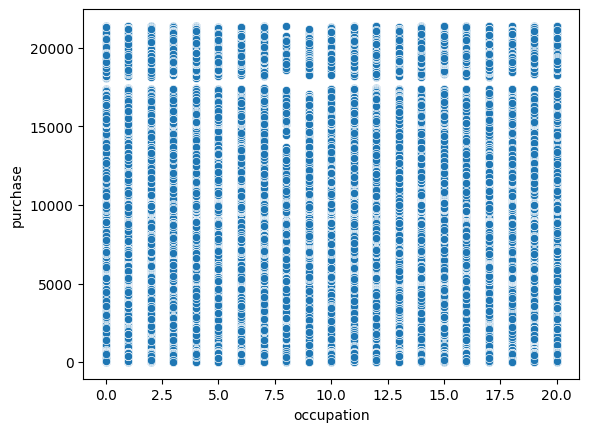

In [32]:
sns.scatterplot(x="occupation", y="purchase", data=df)

<Axes: xlabel='occupation', ylabel='purchase'>

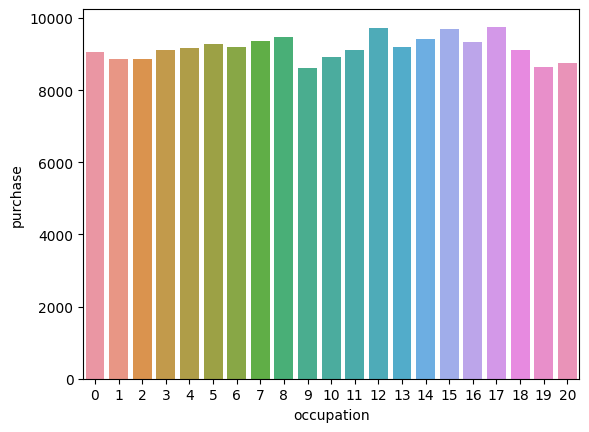

In [33]:
df_pivot_mean=df.groupby(['occupation'])['purchase'].mean().reset_index()
sns.barplot(x='occupation', y='purchase', data=df_pivot_mean)

Age vs Purchase

<Axes: xlabel='age', ylabel='purchase'>

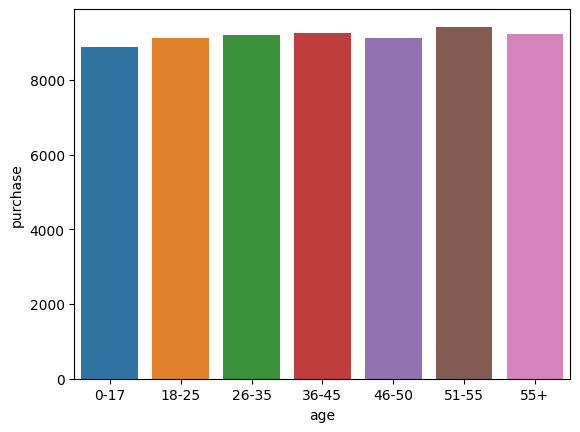

In [34]:

df_pivot_mean_age=df.groupby(['age'])['purchase'].mean().reset_index()
sns.barplot(x='age', y='purchase', data=df_pivot_mean_age)